In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
!ls -1 /content/drive/MyDrive/bill_data/train/images | wc -l
!ls -1 /content/drive/MyDrive/bill_data/valid/images | wc -l

805
230


In [4]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.4/660.4 kB 9.2 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

result = model.train(
    data = '/content/drive/MyDrive/bill_data/data.yaml',
    imgsz = 1200,
    epochs = 30,
    batch = 8,
    name = 'yolov8x_v8_50e'
)

100%|██████████| 6.23M/6.23M [00:00<00:00, 156MB/s]


Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/bill_data/data.yaml, epochs=30, patience=50, batch=8, imgsz=1200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8x_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 42.8MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/bill_data/train/labels.cache... 805 images, 0 backgrounds, 0 corrupt: 100%|██████████| 805/805 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/bill_data/valid/labels.cache... 230 images, 0 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8x_v8_50e/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1216 train, 1216 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8x_v8_50e
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.35G      2.208      3.544      1.845         84       1216: 100%|██████████| 101/101 [00:23<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.69it/s]

                   all        230       2101       0.58      0.398      0.397      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.04G       1.63      1.979      1.442         78       1216: 100%|██████████| 101/101 [00:14<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]

                   all        230       2101      0.647      0.722      0.743      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.92G      1.528      1.618      1.364         96       1216: 100%|██████████| 101/101 [00:14<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.06it/s]

                   all        230       2101       0.69        0.8      0.806      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.05G      1.467      1.481      1.338         74       1216: 100%|██████████| 101/101 [00:14<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]

                   all        230       2101      0.807      0.834      0.856       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.03G      1.433      1.373      1.315         89       1216: 100%|██████████| 101/101 [00:14<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.45it/s]

                   all        230       2101      0.817      0.863      0.883      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.06G        1.4      1.286      1.294         95       1216: 100%|██████████| 101/101 [00:14<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.04it/s]

                   all        230       2101       0.86      0.877      0.908      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.04G      1.376      1.225      1.277         76       1216: 100%|██████████| 101/101 [00:14<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.94it/s]

                   all        230       2101      0.846      0.927       0.93      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.03G      1.367      1.181      1.269         52       1216: 100%|██████████| 101/101 [00:14<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.24it/s]

                   all        230       2101      0.882      0.902      0.932      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.07G      1.342      1.141      1.258         56       1216: 100%|██████████| 101/101 [00:14<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.97it/s]

                   all        230       2101      0.924      0.912      0.945      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.03G      1.326      1.114      1.257         73       1216: 100%|██████████| 101/101 [00:14<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.05it/s]


                   all        230       2101      0.876      0.913      0.942      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.05G      1.326      1.089       1.25         88       1216: 100%|██████████| 101/101 [00:14<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.30it/s]

                   all        230       2101      0.902      0.904      0.946      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.98G      1.306      1.038      1.241         67       1216: 100%|██████████| 101/101 [00:14<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.19it/s]

                   all        230       2101      0.898      0.928      0.947      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.93G      1.294      1.026      1.234        106       1216: 100%|██████████| 101/101 [00:14<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.51it/s]


                   all        230       2101      0.882       0.93      0.938      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.04G      1.284      1.002      1.224         73       1216: 100%|██████████| 101/101 [00:14<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.42it/s]

                   all        230       2101      0.878      0.929      0.953      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.04G      1.261     0.9802      1.216        107       1216: 100%|██████████| 101/101 [00:14<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.62it/s]

                   all        230       2101      0.904      0.936      0.952      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.94G      1.254     0.9667      1.212        102       1216: 100%|██████████| 101/101 [00:14<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.77it/s]


                   all        230       2101       0.89      0.942      0.947      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.79G       1.24     0.9349      1.204         73       1216: 100%|██████████| 101/101 [00:14<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.55it/s]

                   all        230       2101      0.907       0.94      0.947      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.04G       1.24     0.9292      1.206         97       1216: 100%|██████████| 101/101 [00:14<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.62it/s]

                   all        230       2101      0.899      0.922      0.948      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.02G      1.229     0.9222      1.202         87       1216: 100%|██████████| 101/101 [00:14<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.62it/s]

                   all        230       2101      0.891      0.957      0.956      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.09G      1.229     0.9107      1.199         78       1216: 100%|██████████| 101/101 [00:14<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.84it/s]

                   all        230       2101      0.879      0.942      0.945      0.584


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.31G      1.239     0.9521      1.216         44       1216: 100%|██████████| 101/101 [00:16<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.97it/s]

                   all        230       2101      0.898      0.945      0.952      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.98G      1.207     0.9088      1.205         42       1216: 100%|██████████| 101/101 [00:13<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.71it/s]

                   all        230       2101      0.916      0.938      0.961      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.98G       1.21     0.8894      1.201         44       1216: 100%|██████████| 101/101 [00:13<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.75it/s]

                   all        230       2101      0.916      0.941       0.96      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.98G      1.199     0.8807      1.198         45       1216: 100%|██████████| 101/101 [00:13<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.72it/s]

                   all        230       2101      0.905      0.949      0.956      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.97G      1.188     0.8622      1.193         43       1216: 100%|██████████| 101/101 [00:13<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.62it/s]

                   all        230       2101      0.926      0.942      0.964      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.98G      1.177     0.8568      1.191         45       1216: 100%|██████████| 101/101 [00:14<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.10it/s]

                   all        230       2101      0.902      0.956      0.959      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.97G      1.157     0.8444       1.18         42       1216: 100%|██████████| 101/101 [00:13<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.15it/s]

                   all        230       2101      0.929       0.95      0.966      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.98G      1.149     0.8249      1.179         46       1216: 100%|██████████| 101/101 [00:13<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.11it/s]

                   all        230       2101      0.908      0.946      0.962       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.98G      1.142     0.8172      1.169         47       1216: 100%|██████████| 101/101 [00:14<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.22it/s]

                   all        230       2101      0.904      0.951      0.962      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.98G      1.139     0.8125      1.167         47       1216: 100%|██████████| 101/101 [00:14<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.40it/s]

                   all        230       2101      0.935      0.942      0.966      0.624



30 epochs completed in 0.149 hours.
Optimizer stripped from runs/detect/yolov8x_v8_50e/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/yolov8x_v8_50e/weights/best.pt, 6.4MB

Validating runs/detect/yolov8x_v8_50e/weights/best.pt...
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.61it/s]


                   all        230       2101      0.935      0.941      0.966      0.624
         diachicungcap        230         40       0.98          1      0.995      0.706
             diachikho        230        131      0.854      0.962      0.941      0.516
                dongia        230        230      0.949      0.981      0.984      0.726
                   kho        230        122      0.918      0.934      0.942      0.542
           ngaynhapkho        230        232      0.941      0.918      0.961      0.541
             nguoigiao        230        201      0.903      0.926      0.951      0.493
            nhacungcap        230        228      0.947      0.936       0.97      0.563
               sanpham        230        228       0.99          1      0.995      0.889
              sohoadon        230        230      0.923      0.734      0.917      0.477
             thanhtien        230        229      0.983      0.996      0.993      0.776
              thucnha

In [8]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [9]:
!yolo task=detect mode=val model=/content/runs/detect/yolov8x_v8_50e/weights/best.pt name=yolov8n_eval data=/content/drive/MyDrive/bill_data/data.yaml

Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/bill_data/valid/labels.cache... 230 images, 0 backgrounds, 0 corrupt: 100% 230/230 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20% 3/15 [00:06<00:28,  2.38s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:11<00:00,  1.35it/s]
                   all        230       2101      0.935       0.91       0.94       0.61
         diachicungcap        230         40       0.98          1      0.995      0.712
             diachikho        230        131      0.849      0.916      0.903      0.494
                dongia        230        230      0.948      0.951      0.957      0.707
                   kho        230   

In [10]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/yolov8x_v8_50e/weights/best.pt \
source=/content/drive/MyDrive/bill_data/test/images \
imgsz=1280 \
name=yolov8n_v8_50e_infer1280 \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs

image 1/115 /content/drive/MyDrive/bill_data/test/images/1-132-_png.rf.77e1c2c6dac57baa98f3b3e020febc0e.jpg: 576x1280 1 diachikho, 2 dongias, 1 ngaynhapkho, 1 nguoigiao, 2 nhacungcaps, 1 sanpham, 1 sohoadon, 1 thanhtien, 2 thucnhaps, 53.1ms
image 2/115 /content/drive/MyDrive/bill_data/test/images/1-135-_png.rf.959b2d6672c346da9be0f8b535abaf97.jpg: 608x1280 2 diachikhos, 1 dongia, 1 ngaynhapkho, 1 nguoigiao, 2 nhacungcaps, 1 sanpham, 1 sohoadon, 1 thanhtien, 2 thucnhaps, 63.9ms
image 3/115 /content/drive/MyDrive/bill_data/test/images/1-153-_png.rf.4172ff80736b722d7ecc7aae0e0e8b48.jpg: 608x1280 2 diachikhos, 1 dongia, 1 ngaynhapkho, 1 nguoigiao, 2 nhacungcaps, 1 sanpham, 1 sohoadon, 1

In [11]:
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

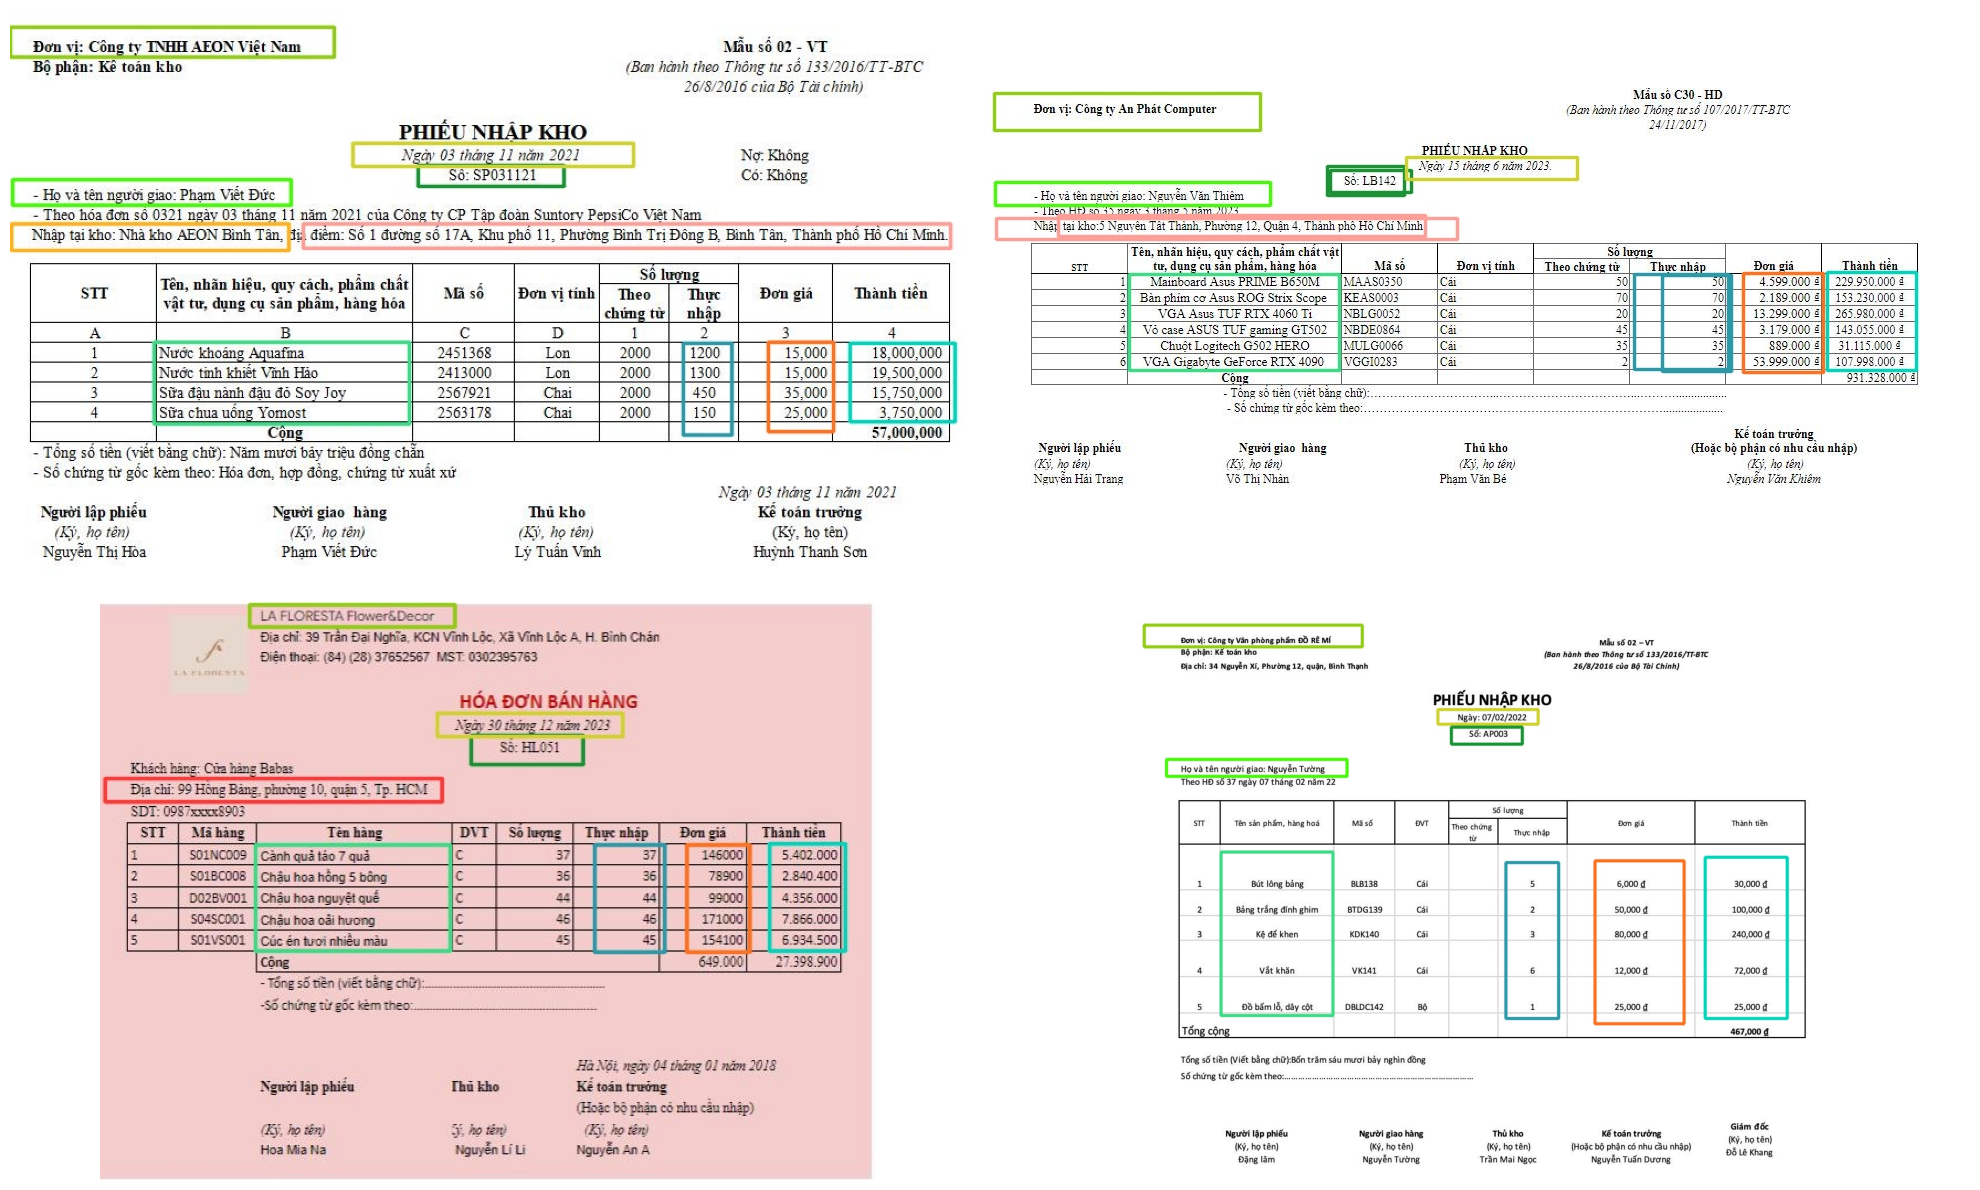

In [12]:
visualize('/content/runs/detect/yolov8n_v8_50e_infer1280')